In [33]:
from azure.storage.blob import BlockBlobService
import os
import pandas as pd

In [34]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

In [35]:
my_key = 'AJCUenkBC+LYslpZXFlJqha/pcNHWNBNoDQg/+rHb7QFktedIKuczFhMfbJPl2fn3lO6+xNkBDoXtm7QBSukFA=='
my_name = 'nithindev'
container_name = 'junction-one'
blob_service = BlockBlobService(account_key=my_key,account_name=my_name)

In [36]:
blobs = blob_service.list_blobs(container_name=container_name)

In [37]:
for blob in blobs:
    blobname = blob.name
    filename = blobname.replace(":","-")
    os.makedirs('raw_data',exist_ok=True)
    blob_service.get_blob_to_path(container_name=container_name,blob_name=blobname,file_path=f'raw_data/{filename}')

In [38]:
files = os.listdir('raw_data/')

In [39]:
try:
    del df
except:
    pass
for i,f in enumerate(files):
    if i ==0:
        df = pd.read_csv(f"raw_data/{f}")
    else:
        df = df.append(pd.read_csv(f"raw_data/{f}"))

In [40]:
df = df.reset_index(drop=True)
df['timestamp_India'] = pd.to_datetime(df['timestamp_India'])
df.sort_values(['timestamp_India'],inplace=True)

In [41]:
df.columns

Index(['destination', 'destination_addresses', 'distance.text',
       'distance.value', 'duration.text', 'duration.value',
       'duration_in_traffic.text', 'duration_in_traffic.value', 'origin',
       'origin_addresses', 'road', 'status', 'timestamp_India',
       'timestamp_UTC'],
      dtype='object')

In [42]:
df.head(2)

,destination,destination_addresses,distance.text,distance.value,duration.text,duration.value,duration_in_traffic.text,duration_in_traffic.value,origin,origin_addresses,road,status,timestamp_India,timestamp_UTC
31,"12.955928, 77.714965","Kundalhalli Gate Bus Stop, Bengaluru, Karnatak...",1.0 km,996,4 mins,233,5 mins,272,"12.964115, 77.717878","4, ITPL Main Rd, Maruthi Nagar, AECS Layout - ...",road_b1,OK,2019-06-02 16:41:26,2019-06-02 11:11:26
30,"12.956066, 77.714548","94/1, Varthur Rd, Vaikuntam Layout, Lakshminar...",1.4 km,1408,5 mins,278,13 mins,757,"12.956956, 77.701577","Marathahalli Bridge, Outer Ring Rd, Marathahal...",road_a1,OK,2019-06-02 16:41:26,2019-06-02 11:11:26


In [43]:
df_a1 = df[df['road']=='road_a1']

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 31 to 40
Data columns (total 14 columns):
destination                  234 non-null object
destination_addresses        234 non-null object
distance.text                234 non-null object
distance.value               234 non-null int64
duration.text                234 non-null object
duration.value               234 non-null int64
duration_in_traffic.text     234 non-null object
duration_in_traffic.value    234 non-null int64
origin                       234 non-null object
origin_addresses             234 non-null object
road                         234 non-null object
status                       234 non-null object
timestamp_India              234 non-null datetime64[ns]
timestamp_UTC                234 non-null object
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 27.4+ KB


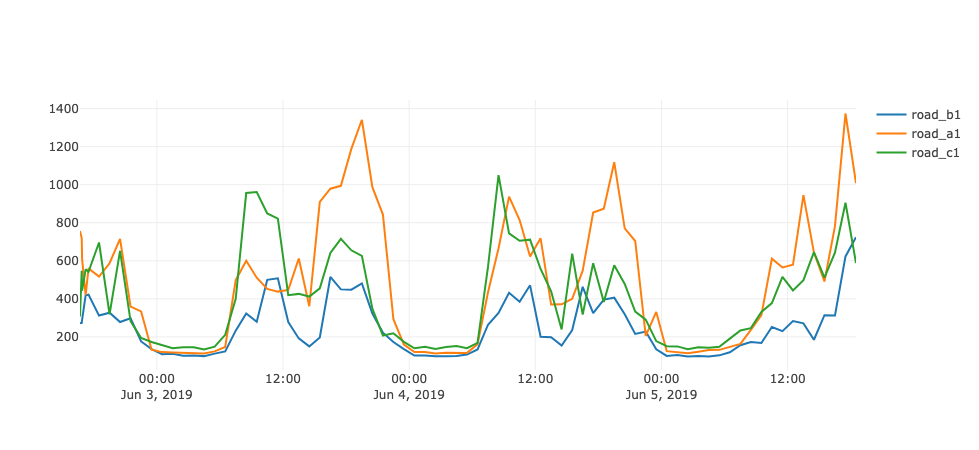

In [46]:
traces = []
for road in df.road.unique():
    df_ = df[df['road']==road]
    tr = go.Scatter(x=df_.timestamp_India,y=df_['duration_in_traffic.value'],name=road)
    traces.append(tr)
iplot(traces)

In [47]:
df

,destination,destination_addresses,distance.text,distance.value,duration.text,duration.value,duration_in_traffic.text,duration_in_traffic.value,origin,origin_addresses,road,status,timestamp_India,timestamp_UTC
31,"12.955928, 77.714965","Kundalhalli Gate Bus Stop, Bengaluru, Karnatak...",1.0 km,996,4 mins,233,5 mins,272,"12.964115, 77.717878","4, ITPL Main Rd, Maruthi Nagar, AECS Layout - ...",road_b1,OK,2019-06-02 16:41:26,2019-06-02 11:11:26
30,"12.956066, 77.714548","94/1, Varthur Rd, Vaikuntam Layout, Lakshminar...",1.4 km,1408,5 mins,278,13 mins,757,"12.956956, 77.701577","Marathahalli Bridge, Outer Ring Rd, Marathahal...",road_a1,OK,2019-06-02 16:41:26,2019-06-02 11:11:26
32,"12.955808, 77.714829","Kundalhalli Gate Bus Stop, Bengaluru, Karnatak...",1.1 km,1063,5 mins,281,5 mins,307,"12.955790, 77.724528","Meenakshi Layout Rd, Thubarahalli, Whitefield,...",road_c1,OK,2019-06-02 16:41:26,2019-06-02 11:11:26
177,"12.956066, 77.714548","94/1, Varthur Rd, Vaikuntam Layout, Lakshminar...",1.4 km,1408,5 mins,278,12 mins,719,"12.956956, 77.701577","Marathahalli Bridge, Outer Ring Rd, Marathahal...",road_a1,OK,2019-06-02 16:51:14,2019-06-02 11:21:14
178,"12.955928, 77.714965","Kundalhalli Gate Bus Stop, Bengaluru, Karnatak...",1.0 km,996,4 mins,233,5 mins,274,"12.964115, 77.717878","4, ITPL Main Rd, Maruthi Nagar, AECS Layout - ...",road_b1,OK,2019-06-02 16:51:14,2019-06-02 11:21:14
179,"12.955808, 77.714829","Kundalhalli Gate Bus Stop, Bengaluru, Karnatak...",1.1 km,1063,5 mins,281,9 mins,547,"12.955790, 77.724528","Meenakshi Layout Rd, Thubarahalli, Whitefield,...",road_c1,OK,2019-06-02 16:51:14,2019-06-02 11:21:14
0,"12.956066, 77.714548","94/1, Varthur Rd, Vaikuntam Layout, Lakshminar...",1.4 km,1408,5 mins,278,10 mins,609,"12.956956, 77.701577","Marathahalli Bridge, Outer Ring Rd, Marathahal...",road_a1,OK,2019-06-02 16:53:24,2019-06-02 11:23:24
2,"12.955808, 77.714829","Kundalhalli Gate Bus Stop, Bengaluru, Karnatak...",1.1 km,1063,5 mins,281,7 mins,443,"12.955790, 77.724528","Meenakshi Layout Rd, Thubarahalli, Whitefield,...",road_c1,OK,2019-06-02 16:53:24,2019-06-02 11:23:24
1,"12.955928, 77.714965","Kundalhalli Gate Bus Stop, Bengaluru, Karnatak...",1.0 km,996,4 mins,233,5 mins,290,"12.964115, 77.717878","4, ITPL Main Rd, Maruthi Nagar, AECS Layout - ...",road_b1,OK,2019-06-02 16:53:24,2019-06-02 11:23:24
226,"12.955928, 77.714965","Kundalhalli Gate Bus Stop, Bengaluru, Karnatak...",1.0 km,996,4 mins,233,7 mins,419,"12.964115, 77.717878","4, ITPL Main Rd, Maruthi Nagar, AECS Layout - ...",road_b1,OK,2019-06-02 17:13:42,2019-06-02 11:43:42
